Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.style.use('fivethirtyeight')

In [2]:
phil = pd.read_csv('vaccination_tweets.csv')
phil.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [3]:
phil.isnull().sum()/phil.shape[0]*100

id                   0.000000
user_name            0.000000
user_location       20.716198
user_description     6.325301
user_created         0.000000
user_followers       0.000000
user_friends         0.000000
user_favourites      0.000000
user_verified        0.000000
date                 0.000000
text                 0.000000
hashtags            24.983266
source               0.016734
retweets             0.000000
favorites            0.000000
is_retweet           0.000000
dtype: float64

label

([<matplotlib.patches.Wedge at 0x7fca5a004d10>,
 [Text(-0.8474604181182154, -0.7773743240697494, 'False'),
  Text(0.8106143477919185, 0.7435754024669474, 'True')],
 [Text(-0.47899936676246946, -0.43938548751768447, '90.3%'),
  Text(0.4421532806137737, 0.4055865831637894, '9.7%')])

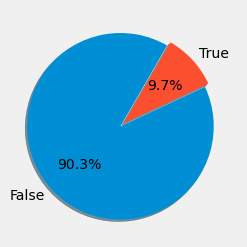

In [4]:
x = phil['user_verified'].value_counts()
plt.pie(x, labels=["False", "True"], autopct='%1.1f%%',
       shadow=True, explode=(0.05, 0), startangle=60)

Keywords

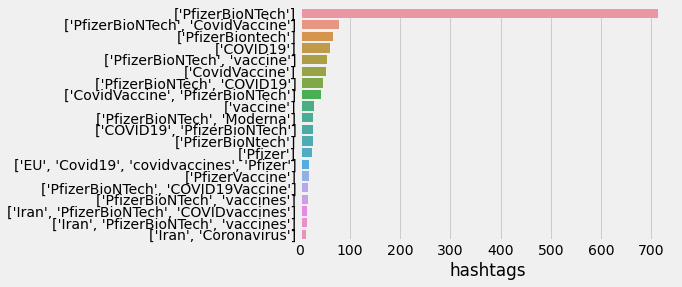

In [5]:
sns.barplot(y = phil['hashtags'].value_counts()[:20].index,
           x = phil['hashtags'].value_counts()[:20], orient = 'h')

In [6]:
grouped_df = phil.groupby('hashtags').agg(['count', 'sum'])

grouped_df

id                \
                                                   count           sum   
hashtags                                                                 
['14days']                                             1  1.356483e+18   
['1stJabDone', 'PfizerBioNTech', 'COVID']              1  1.362065e+18   
['22dicembre', 'VaccinoAntiCovid', 'vaccino', '...     1  1.341384e+18   
['24hourcheck', 'shot1done', 'vaccinessavelives...     1  1.340707e+18   
['28DaysNot12weeks']                                   1  1.347465e+18   
...                                                  ...           ...   
['womenhealth', 'pregnant', 'HumanRights', 'wom...     2  2.725680e+18   
['worldwide', 'UnitedStates', 'Brazil', 'Turkey...     1  1.338229e+18   
['zensur', 'Impfstoff', 'nebenwirkungen', 'Pfiz...     1  1.358858e+18   
['واكسن_کرونا', 'زندگی_من']                            1  1.347938e+18   
['واکسن_بخرید']                                        2  2.683448e+18   

                                                   user_name  \
                                                       count   
hashtags                                                       
['14days']                                                 1   
['1stJabDone', 'PfizerBioNTech', 'COVID']                  1   
['22dicembre', 'VaccinoAntiCovid', 'vaccino', '...         1   
['24hourcheck', 'shot1done', 'vaccinessavelives...         1   
['28DaysNot12weeks']                                       1   
...                                                      ...   
['womenhealth', 'pregnant', 'HumanRights', 'wom...         2   
['worldwide', 'UnitedStates', 'Brazil', 'Turkey...         1   
['zensur', 'Impfstoff', 'nebenwirkungen', 'Pfiz...         1   
['واكسن_کرونا', 'زندگی_من']                                1   
['واکسن_بخرید']                                            2   

                                                                                \
                                                                           sum   
hashtags                                                                         
['14days']                                                             VinceZA   
['1stJabDone', 'PfizerBioNTech', 'COVID']                      Julia Greenough   
['22dicembre', 'VaccinoAntiCovid', 'vaccino', '...                     Roberto   
['24hourcheck', 'shot1done', 'vaccinessavelives...  Steve Schiebel MD CPE FAAP   
['28DaysNot12weeks']                                            Darren Halsted   
...                                                                        ...   
['womenhealth', 'pregnant', 'HumanRights', 'wom...  Pratica RadioPratica Radio   
['worldwide', 'UnitedStates', 'Brazil', 'Turkey...                 Tamer Yazar   
['zensur', 'Impfstoff', 'nebenwirkungen', 'Pfiz...          Werner Hochleitner   
['واكسن_کرونا', 'زندگی_من']                                   Rackham le Rouge   
['واکسن_بخرید']                                                   🌊Masi🌊🌊Masi🌊   

                                                   user_created  \
                                                          count   
hashtags                                                          
['14days']                                                    1   
['1stJabDone', 'PfizerBioNTech', 'COVID']                     1   
['22dicembre', 'VaccinoAntiCovid', 'vaccino', '...            1   
['24hourcheck', 'shot1done', 'vaccinessavelives...            1   
['28DaysNot12weeks']                                          1   
...                                                         ...   
['womenhealth', 'pregnant', 'HumanRights', 'wom...            2   
['worldwide', 'UnitedStates', 'Brazil', 'Turkey...            1   
['zensur', 'Impfstoff', 'nebenwirkungen', 'Pfiz...            1   
['واكسن_کرونا', 'زندگی_من']                                   1   
['واکسن_بخرید']                                               2   

                                

In [7]:
grouped_df['proportion'] = 100 * grouped_df['user_verified']['sum'] / grouped_df['user_verified']['count']
grouped_df

id                \
                                                   count           sum   
hashtags                                                                 
['14days']                                             1  1.356483e+18   
['1stJabDone', 'PfizerBioNTech', 'COVID']              1  1.362065e+18   
['22dicembre', 'VaccinoAntiCovid', 'vaccino', '...     1  1.341384e+18   
['24hourcheck', 'shot1done', 'vaccinessavelives...     1  1.340707e+18   
['28DaysNot12weeks']                                   1  1.347465e+18   
...                                                  ...           ...   
['womenhealth', 'pregnant', 'HumanRights', 'wom...     2  2.725680e+18   
['worldwide', 'UnitedStates', 'Brazil', 'Turkey...     1  1.338229e+18   
['zensur', 'Impfstoff', 'nebenwirkungen', 'Pfiz...     1  1.358858e+18   
['واكسن_کرونا', 'زندگی_من']                            1  1.347938e+18   
['واکسن_بخرید']                                        2  2.683448e+18   

                                                   user_name  \
                                                       count   
hashtags                                                       
['14days']                                                 1   
['1stJabDone', 'PfizerBioNTech', 'COVID']                  1   
['22dicembre', 'VaccinoAntiCovid', 'vaccino', '...         1   
['24hourcheck', 'shot1done', 'vaccinessavelives...         1   
['28DaysNot12weeks']                                       1   
...                                                      ...   
['womenhealth', 'pregnant', 'HumanRights', 'wom...         2   
['worldwide', 'UnitedStates', 'Brazil', 'Turkey...         1   
['zensur', 'Impfstoff', 'nebenwirkungen', 'Pfiz...         1   
['واكسن_کرونا', 'زندگی_من']                                1   
['واکسن_بخرید']                                            2   

                                                                                \
                                                                           sum   
hashtags                                                                         
['14days']                                                             VinceZA   
['1stJabDone', 'PfizerBioNTech', 'COVID']                      Julia Greenough   
['22dicembre', 'VaccinoAntiCovid', 'vaccino', '...                     Roberto   
['24hourcheck', 'shot1done', 'vaccinessavelives...  Steve Schiebel MD CPE FAAP   
['28DaysNot12weeks']                                            Darren Halsted   
...                                                                        ...   
['womenhealth', 'pregnant', 'HumanRights', 'wom...  Pratica RadioPratica Radio   
['worldwide', 'UnitedStates', 'Brazil', 'Turkey...                 Tamer Yazar   
['zensur', 'Impfstoff', 'nebenwirkungen', 'Pfiz...          Werner Hochleitner   
['واكسن_کرونا', 'زندگی_من']                                   Rackham le Rouge   
['واکسن_بخرید']                                                   🌊Masi🌊🌊Masi🌊   

                                                   user_created  \
                                                          count   
hashtags                                                          
['14days']                                                    1   
['1stJabDone', 'PfizerBioNTech', 'COVID']                     1   
['22dicembre', 'VaccinoAntiCovid', 'vaccino', '...            1   
['24hourcheck', 'shot1done', 'vaccinessavelives...            1   
['28DaysNot12weeks']                                          1   
...                                                         ...   
['womenhealth', 'pregnant', 'HumanRights', 'wom...            2   
['worldwide', 'UnitedStates', 'Brazil', 'Turkey...            1   
['zensur', 'Impfstoff', 'nebenwirkungen', 'Pfiz...            1   
['واكسن_کرونا', 'زندگی_من']                                   1   
['واکسن_بخرید']                                               2   

                                

In [8]:
grouped_df.loc[grouped_df['proportion'] >= 50, 'keyword truth'] = 'high'
grouped_df.loc[grouped_df['proportion'] < 50, 'keyword truth'] = 'low'

grouped_df

id                \
                                                   count           sum   
hashtags                                                                 
['14days']                                             1  1.356483e+18   
['1stJabDone', 'PfizerBioNTech', 'COVID']              1  1.362065e+18   
['22dicembre', 'VaccinoAntiCovid', 'vaccino', '...     1  1.341384e+18   
['24hourcheck', 'shot1done', 'vaccinessavelives...     1  1.340707e+18   
['28DaysNot12weeks']                                   1  1.347465e+18   
...                                                  ...           ...   
['womenhealth', 'pregnant', 'HumanRights', 'wom...     2  2.725680e+18   
['worldwide', 'UnitedStates', 'Brazil', 'Turkey...     1  1.338229e+18   
['zensur', 'Impfstoff', 'nebenwirkungen', 'Pfiz...     1  1.358858e+18   
['واكسن_کرونا', 'زندگی_من']                            1  1.347938e+18   
['واکسن_بخرید']                                        2  2.683448e+18   

                                                   user_name  \
                                                       count   
hashtags                                                       
['14days']                                                 1   
['1stJabDone', 'PfizerBioNTech', 'COVID']                  1   
['22dicembre', 'VaccinoAntiCovid', 'vaccino', '...         1   
['24hourcheck', 'shot1done', 'vaccinessavelives...         1   
['28DaysNot12weeks']                                       1   
...                                                      ...   
['womenhealth', 'pregnant', 'HumanRights', 'wom...         2   
['worldwide', 'UnitedStates', 'Brazil', 'Turkey...         1   
['zensur', 'Impfstoff', 'nebenwirkungen', 'Pfiz...         1   
['واكسن_کرونا', 'زندگی_من']                                1   
['واکسن_بخرید']                                            2   

                                                                                \
                                                                           sum   
hashtags                                                                         
['14days']                                                             VinceZA   
['1stJabDone', 'PfizerBioNTech', 'COVID']                      Julia Greenough   
['22dicembre', 'VaccinoAntiCovid', 'vaccino', '...                     Roberto   
['24hourcheck', 'shot1done', 'vaccinessavelives...  Steve Schiebel MD CPE FAAP   
['28DaysNot12weeks']                                            Darren Halsted   
...                                                                        ...   
['womenhealth', 'pregnant', 'HumanRights', 'wom...  Pratica RadioPratica Radio   
['worldwide', 'UnitedStates', 'Brazil', 'Turkey...                 Tamer Yazar   
['zensur', 'Impfstoff', 'nebenwirkungen', 'Pfiz...          Werner Hochleitner   
['واكسن_کرونا', 'زندگی_من']                                   Rackham le Rouge   
['واکسن_بخرید']                                                   🌊Masi🌊🌊Masi🌊   

                                                   user_created  \
                                                          count   
hashtags                                                          
['14days']                                                    1   
['1stJabDone', 'PfizerBioNTech', 'COVID']                     1   
['22dicembre', 'VaccinoAntiCovid', 'vaccino', '...            1   
['24hourcheck', 'shot1done', 'vaccinessavelives...            1   
['28DaysNot12weeks']                                          1   
...                                                         ...   
['womenhealth', 'pregnant', 'HumanRights', 'wom...            2   
['worldwide', 'UnitedStates', 'Brazil', 'Turkey...            1   
['zensur', 'Impfstoff', 'nebenwirkungen', 'Pfiz...            1   
['واكسن_کرونا', 'زندگی_من']                                   1   
['واکسن_بخرید']                                               2   

                                

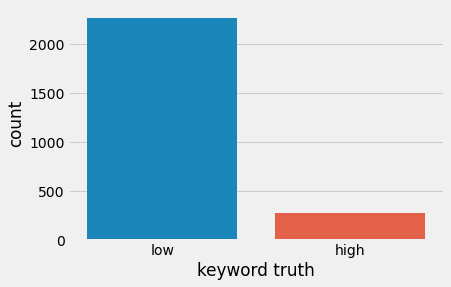

In [9]:
sns.countplot(grouped_df['keyword truth'])

WordCloud (Before)

False vaccination tweets

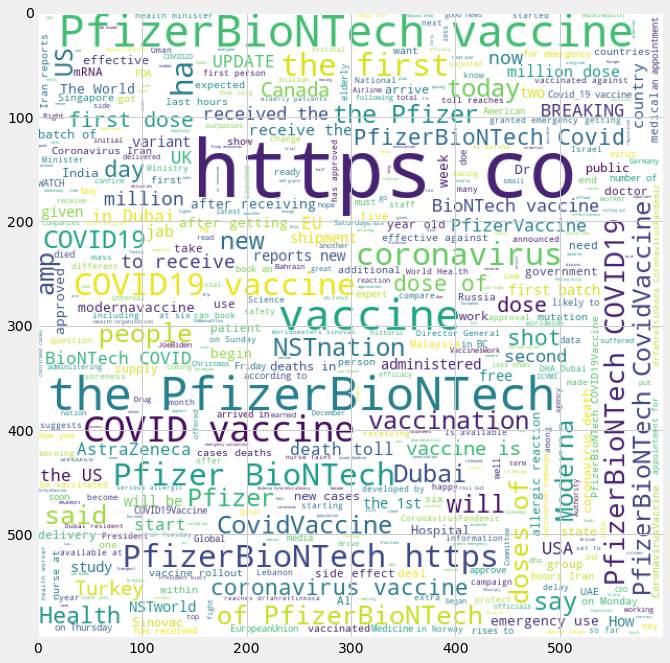

In [10]:
wc = WordCloud(background_color = "white", stopwords = STOPWORDS, max_words = 500,
              width = 600, height = 600, random_state = 1)

wc.generate(" ".join(phil[phil['user_verified'] ==1]['text'].tolist()))

plt.figure(figsize = (10,15))
plt.imshow(wc)

True vaccination tweets

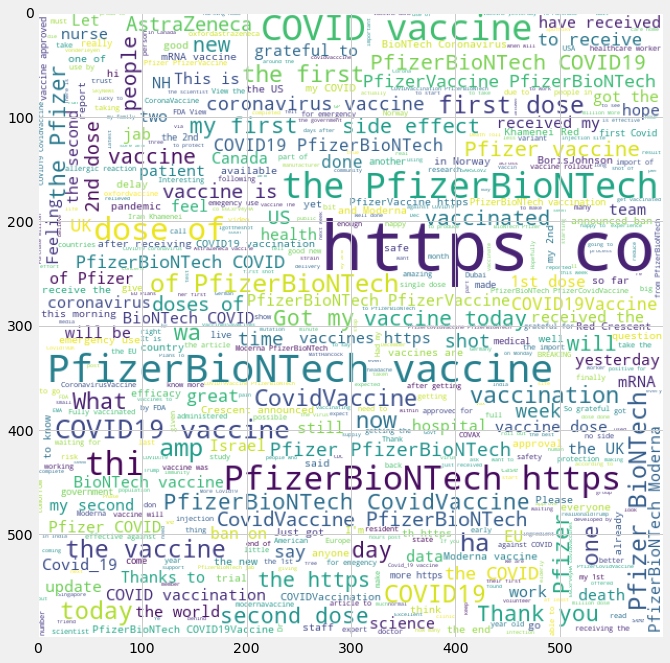

In [11]:
wc = WordCloud(background_color = 'white', stopwords = STOPWORDS, max_words = 500,
              width = 600, height = 600, random_state = 1)

wc.generate(" ".join(phil[phil['user_verified'] == 0]['text'].tolist()))
plt.figure(figsize = (10, 15))
plt.imshow(wc)

Data Cleaning

In [12]:
import re
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from collections import Counter

[nltk_data] Downloading package stopwords to /home/chi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
punctuations = string.punctuation
stopwords = stopwords.words('english')
nlp = spacy.load('en_core_web_sm')

In [14]:
def cleanup_text1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


def cleanup_text2(docs):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc)
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)        
        
    

cleanup_text1

In [15]:
phil['text'] = phil['text'].apply(lambda x: cleanup_text1(x))
 
    
    
#label
false_text = [text for text in phil[phil['user_verified'] == 1]['text']]
true_text = [text for text in phil[phil['user_verified'] == 0]['text']]

#clean_text2
false_clean = cleanup_text2(false_text)
false_clean = " ".join(false_clean).split()
false_clean = [word for word in false_clean if word != '\'s']

true_clean = cleanup_text2(true_text)
true_clean = " ".join(true_clean).split()
true_clean = [word for word in true_clean if word != '\'s']

false_counts = Counter(false_clean)
true_counts = Counter(true_clean)

    

Processed 1000 out of 5396 documents.
Processed 2000 out of 5396 documents.
Processed 3000 out of 5396 documents.
Processed 4000 out of 5396 documents.
Processed 5000 out of 5396 documents.


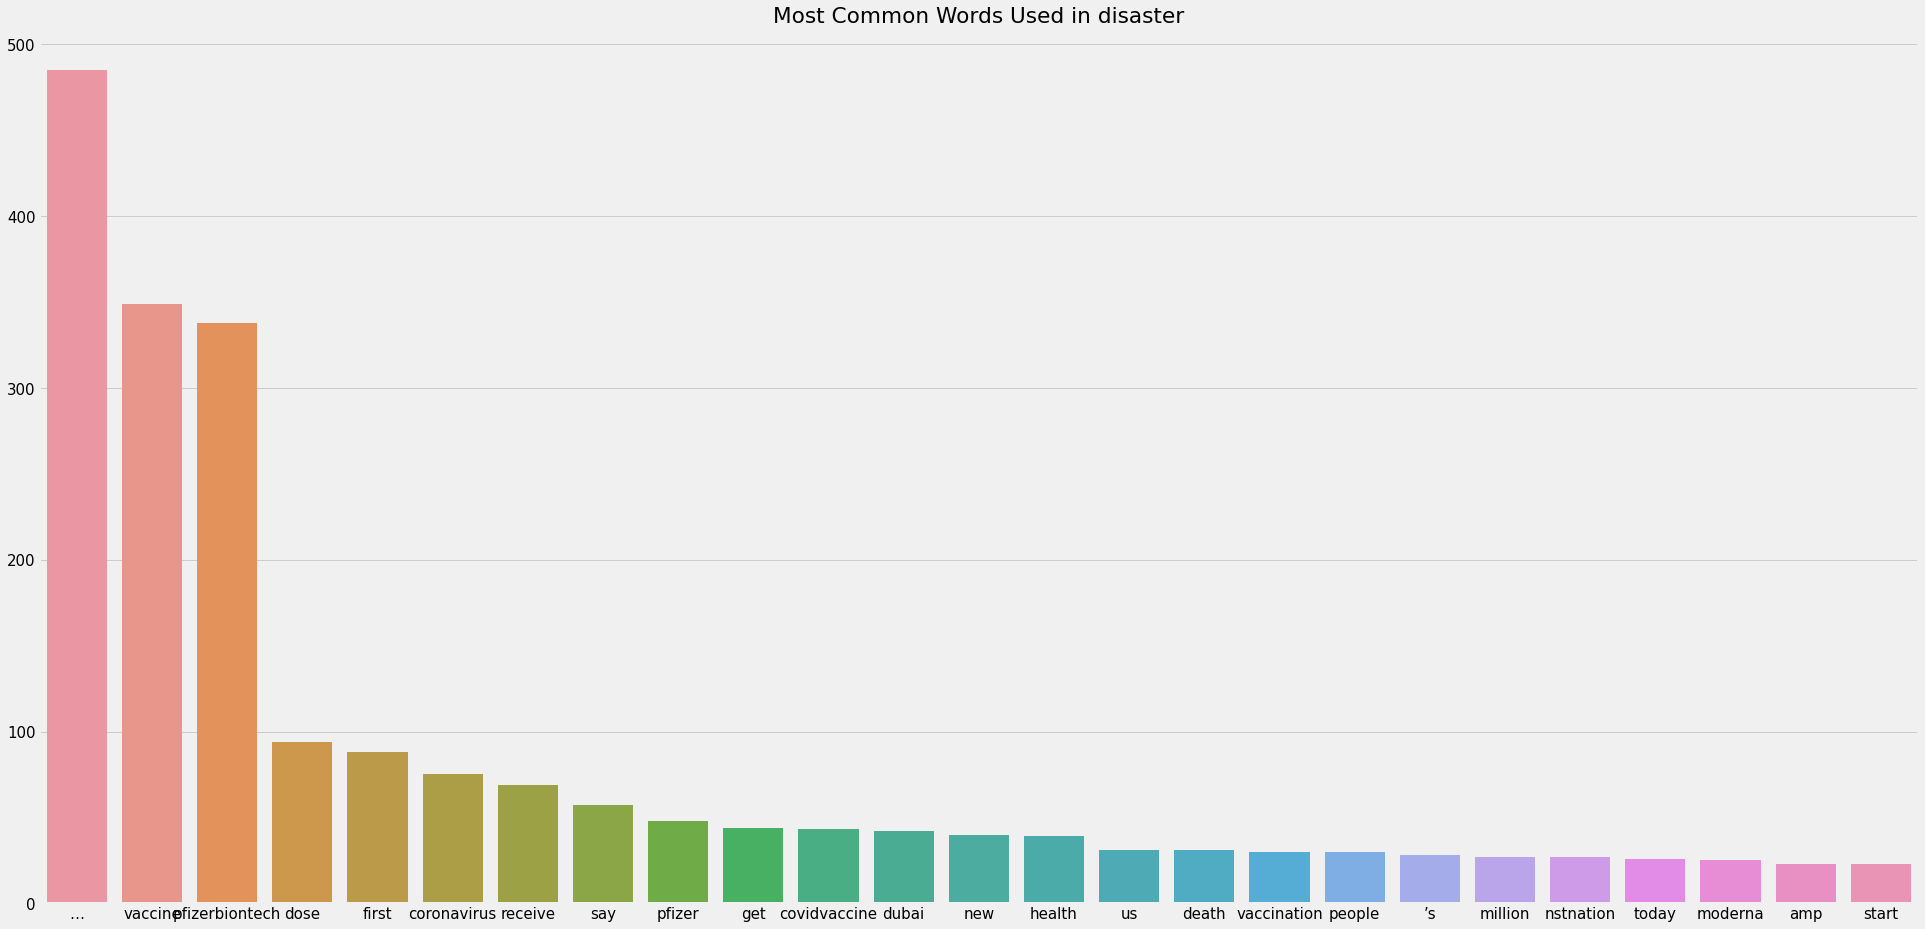

In [16]:
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (30,15)

false_common_words = [word[0] for word in false_counts.most_common(25)]
false_common_counts = [word[1] for word in false_counts.most_common(25)]

sns.barplot(x=false_common_words, y=false_common_counts)
plt.title('Most Common Words Used in disaster')
plt.show()

/home/chi/anaconda3/envs/nltkENv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/chi/anaconda3/envs/nltkENv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128137 missing from current font.
  font.set_text(s, 0, flags=flags)


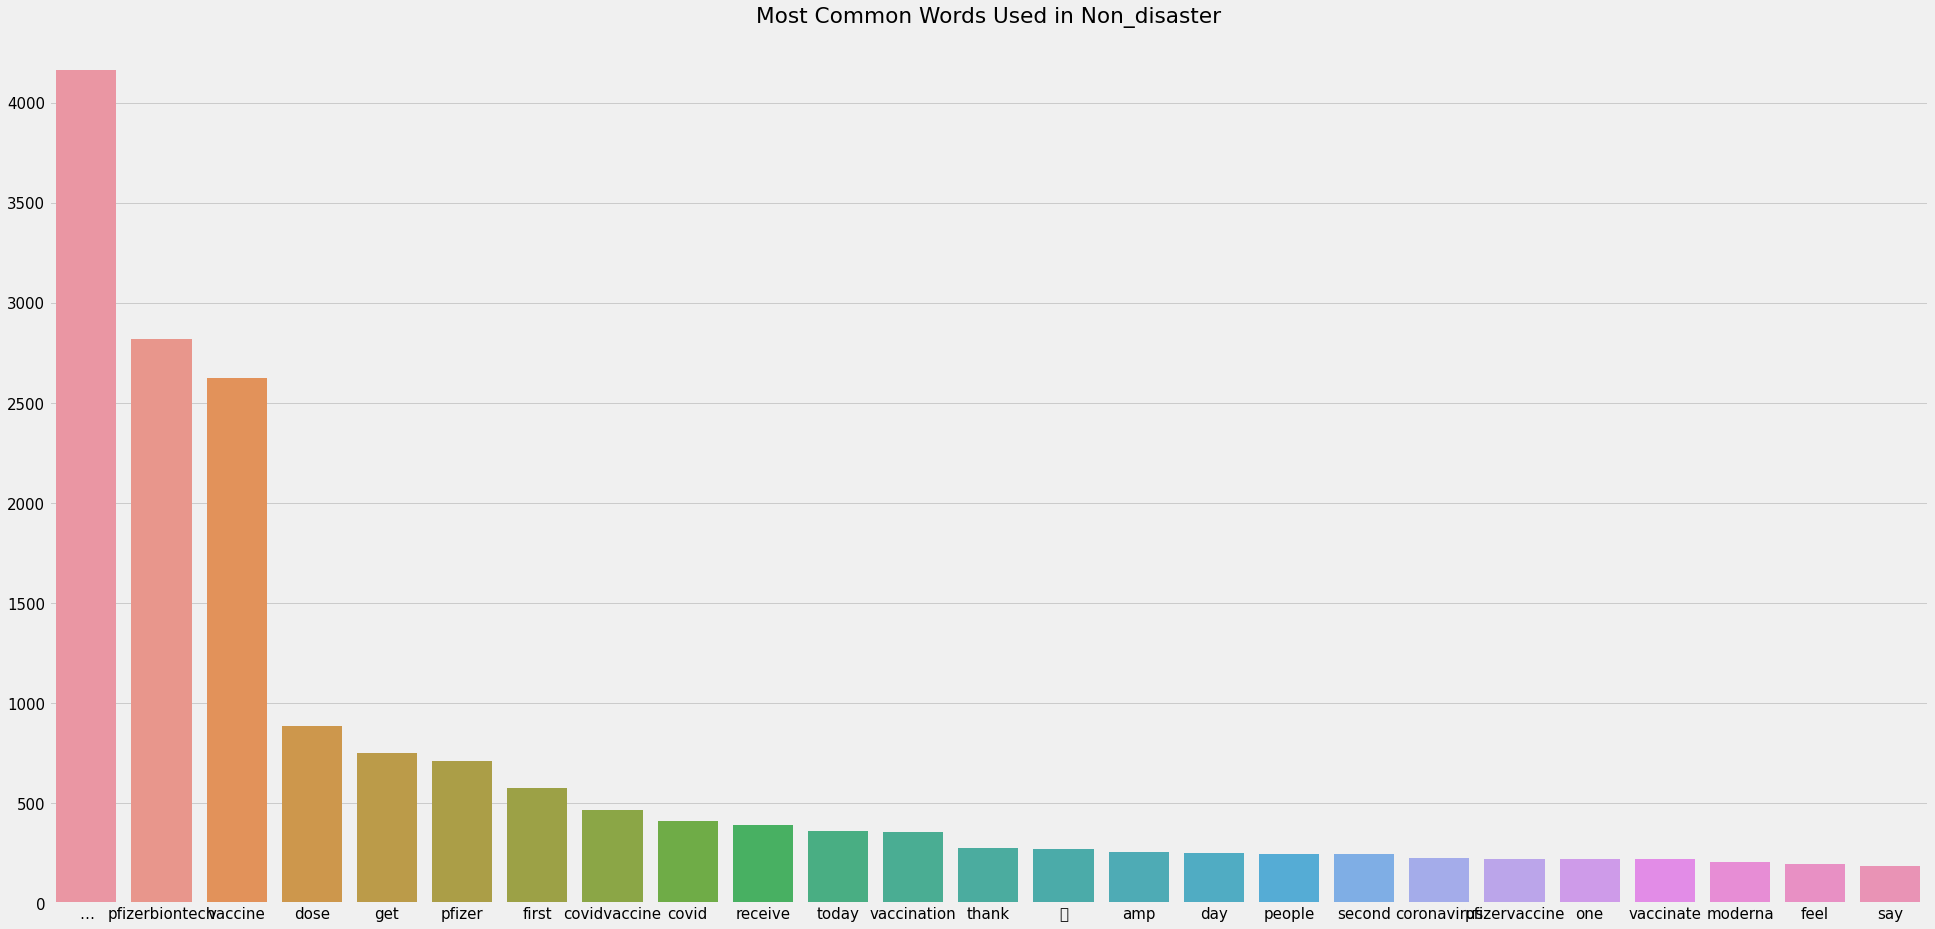

In [17]:
true_common_words = [word[0] for word in true_counts.most_common(25)]
true_common_counts = [word[1] for word in true_counts.most_common(25)]

sns.barplot(x=true_common_words, y=true_common_counts)
plt.title('Most Common Words Used in Non_disaster')
plt.show()

WordCloud (After)

False tweets

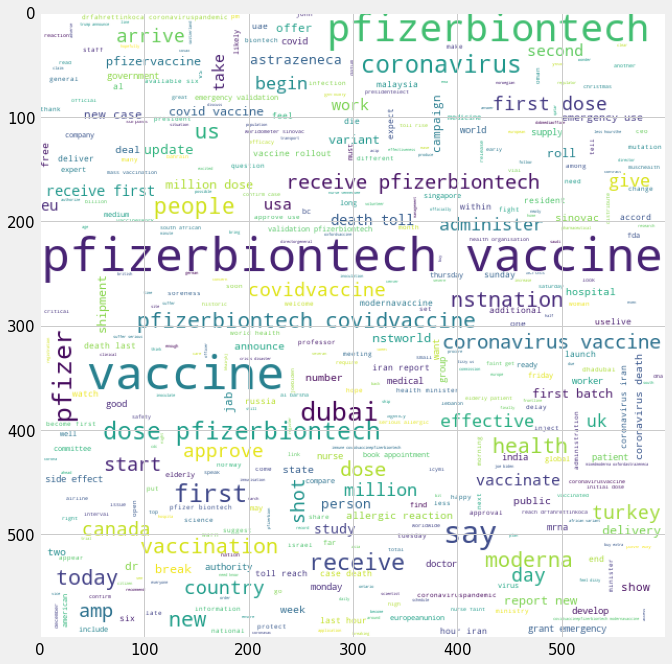

In [18]:
wc = WordCloud(background_color = 'white', stopwords = STOPWORDS, max_words =500,
              width = 600, height = 600, random_state = 1)

wc.generate(" ".join(false_clean))
plt.figure(figsize = (10, 15))
plt.imshow(wc)

True tweets

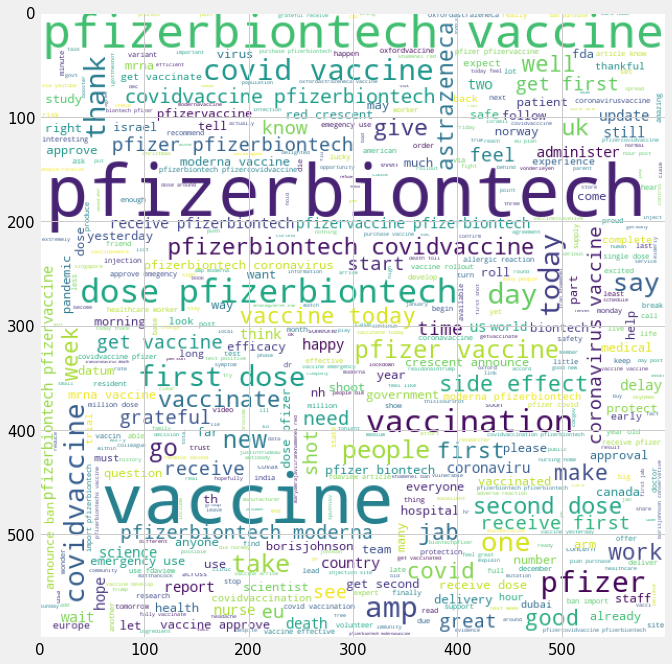

In [19]:
wc = WordCloud(background_color = "white", stopwords = STOPWORDS, max_words = 500,
              width = 600, height = 600, random_state = 1)

wc.generate(" ".join(true_clean))
plt.figure(figsize = (10, 15))
plt.imshow(wc)

Deep Neural Network

In [21]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM,
                          Embedding,
                          BatchNormalization,
                          Dense,
                          TimeDistributed,
                          Dropout,
                          Bidirectional, 
                          Flatten,
                          GlobalMaxPool1D
                          )

from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.metrics import(precision_score,
                            recall_score,
                            f1_score,
                            classification_report,
                            accuracy_score
                            )

In [22]:
train = phil['text'].values
label = phil['user_verified'].values

In [24]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(train)
vocal_length = len(word_tokenizer.word_index) + 1

In [25]:
def metrics(pred, y_test):
    print("F1-score:", f1_score(pred, y_test))
    print("Precision: ", precision_score(pred, y_test))
    print("Recall: ", recall_score(pred, y_test))
    print("Accuracy: ", accuracy_score(pred, y_test))
    print("-"*50)
    print(classification_report(pred, y_test))
    
    
def embed(corpus):
    return word_tokenizer.texts_to_sequences(corpus)    

In [26]:
def plot(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

In [27]:
longest_train = max(train, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))


padded_sentences = pad_sequences(embed(train), length_long_sentence, padding='post')
#test_sentences = pad_sequences(embed(test), length_long_sentence, padding='post')

Array Dictionary

In [28]:
embeddings_dictionary = dict()
embedding_dim = 100
glove_file = open('glove.6B.100d.txt')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype = 'float32')
    embeddings_dictionary[word] = vector_dimensions
    
    
    
glove_file.close()    

Train Glove

In [33]:
embedding_matrix = np.zeros((vocal_length, embedding_dim))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [34]:
X_train, X_test, y_train, y_test = train_test_split(padded_sentences, label, test_size = 0.3)

In [35]:
def BLSTM():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights = [embedding_matrix], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [36]:
model = BLSTM()
checkpoint = ModelCheckpoint(
    'model.h5',
    monitor = 'val_loss',
    verbose = 1,
    save_best_only = True)

Val Loss

In [37]:
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.2,
    verbose = 1,
    patience = 2,
    min_lr = 0.001)

In [38]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 32,
    validation_data = [X_test, y_test], 
    verbose = 1,
    callbacks = [reduce_lr, checkpoint])

Epoch 1/10
131/131 [==============================] - ETA: 0s - loss: 0.4527 - accuracy: 0.8487
Epoch 00001: val_loss improved from inf to 0.00000, saving model to model.h5
131/131 [==============================] - 24s 185ms/step - loss: 0.4527 - accuracy: 0.8487 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/10
131/131 [==============================] - ETA: 0s - loss: 0.3677 - accuracy: 0.8881
Epoch 00002: val_loss did not improve from 0.00000
131/131 [==============================] - 23s 174ms/step - loss: 0.3677 - accuracy: 0.8881 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/10
131/131 [==============================] - ETA: 0s - loss: 0.3403 - accuracy: 0.8970
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.

Epoch 00003: val_loss did not improve from 0.00000
131/131 [==============================] - 23s 175ms/step - loss: 0.3403 - accuracy: 0.8970 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epo

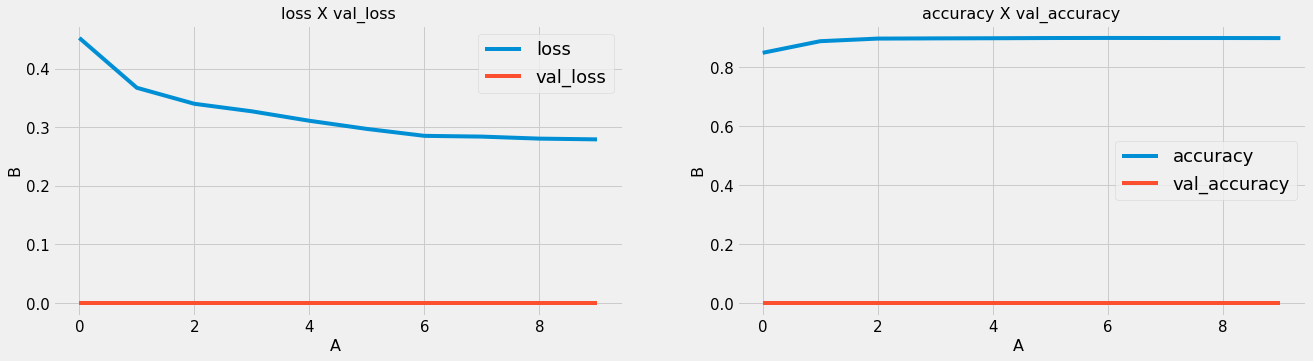

In [39]:
plot(history, [['loss', 'val_loss'], ['accuracy', 'val_accuracy']])

In [40]:
loss, accuracy = model.evaluate(X_test, y_test)
print('loss:', loss)
print('Accuracy:', accuracy)

57/57 [==============================] - 2s 39ms/step - loss: 0.2860 - accuracy: 0.9119
loss: 0.2859666347503662
Accuracy: 0.9118795394897461


In [41]:
preds = model.predict_classes(X_test)
metrics(preds, y_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
F1-score: 0.0
Precision:  0.0
Recall:  0.0
Accuracy:  0.9118795315114333
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1793
           1       0.00      0.00      0.00         0

    accuracy                           0.91      1793
   macro avg       0.50      0.46      0.48      1793
weighted avg       1.00      0.91      0.95      1793



/home/chi/anaconda3/envs/nltkENv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/chi/anaconda3/envs/nltkENv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
model.load_weights('model.h5')
preds = model.predict_classes(X_test)
metrics(preds, y_test)

F1-score: 0.0
Precision:  0.0
Recall:  0.0
Accuracy:  0.9118795315114333
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1793
           1       0.00      0.00      0.00         0

    accuracy                           0.91      1793
   macro avg       0.50      0.46      0.48      1793
weighted avg       1.00      0.91      0.95      1793

